In [374]:
import pandas as pd

In [375]:
teams = pd.read_csv(r"C:\Users\Carlos\Documents\Python Projects\Beginner Machine Learning Project\teams.csv")

In [376]:
teams

,team,country,year,events,athletes,age,height,weight,medals,prev_medals,prev_3_medals
0,AFG,Afghanistan,1964,8,8,22.0,161.0,64.2,0,0.0,0.0
1,AFG,Afghanistan,1968,5,5,23.2,170.2,70.0,0,0.0,0.0
2,AFG,Afghanistan,1972,8,8,29.0,168.3,63.8,0,0.0,0.0
3,AFG,Afghanistan,1980,11,11,23.6,168.4,63.2,0,0.0,0.0
4,AFG,Afghanistan,2004,5,5,18.6,170.8,64.8,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,19,26,25.0,179.0,71.1,0,0.0,0.0
2140,ZIM,Zimbabwe,2004,11,14,25.1,177.8,70.5,3,0.0,0.0
2141,ZIM,Zimbabwe,2008,15,16,26.1,171.9,63.7,4,3.0,1.0
2142,ZIM,Zimbabwe,2012,8,9,27.3,174.4,65.2,0,4.0,2.3


We'll be trying to predict medals so we'll remove unecessary columns

In [377]:
teams = teams[['team', 'country', 'year', 'athletes', 'age', 'prev_medals', 'medals']]

In [378]:
teams

,team,country,year,athletes,age,prev_medals,medals
0,AFG,Afghanistan,1964,8,22.0,0.0,0
1,AFG,Afghanistan,1968,5,23.2,0.0,0
2,AFG,Afghanistan,1972,8,29.0,0.0,0
3,AFG,Afghanistan,1980,11,23.6,0.0,0
4,AFG,Afghanistan,2004,5,18.6,0.0,0
...,...,...,...,...,...,...,...
2139,ZIM,Zimbabwe,2000,26,25.0,0.0,0
2140,ZIM,Zimbabwe,2004,14,25.1,0.0,3
2141,ZIM,Zimbabwe,2008,16,26.1,3.0,4
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0


Let's see the correlation between medals and all other columns

In [379]:
teams.corr()['medals']

C:\Users\Carlos\AppData\Local\Temp\ipykernel_13036\801081661.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  teams.corr()['medals']


year          -0.021603
athletes       0.840817
age            0.025096
prev_medals    0.920048
medals         1.000000
Name: medals, dtype: float64

In [380]:
import seaborn as sns

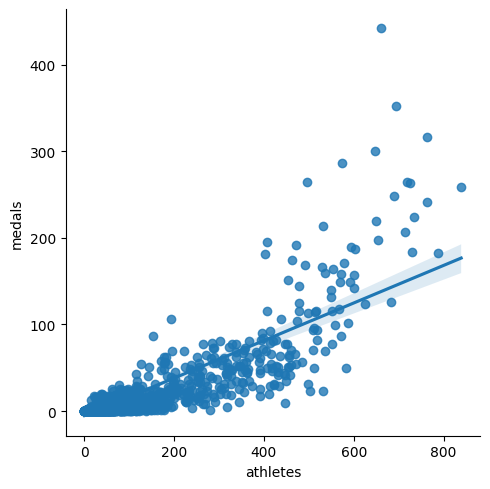

In [381]:
sns.lmplot(x='athletes', y='medals', data=teams, fit_reg=True)

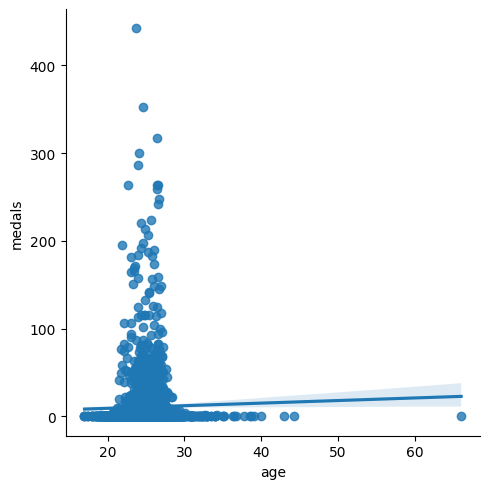

In [382]:
sns.lmplot(x='age', y='medals', data=teams, fit_reg=True)

Make a histogram to look at how many countries fall into each bin/number of medals earned

<AxesSubplot: ylabel='Frequency'>

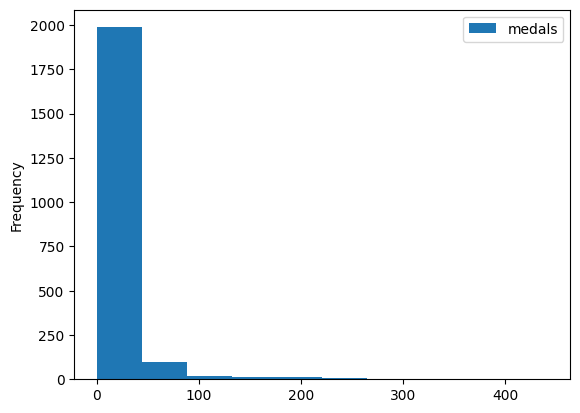

In [383]:
teams.plot.hist(y='medals')

Let's find and remove missing values

In [384]:
teams[teams.isnull().any(axis=1)]

,team,country,year,athletes,age,prev_medals,medals
19,ALB,Albania,1992,9,25.3,NaN,0
26,ALG,Algeria,1964,7,26.0,NaN,0
39,AND,Andorra,1976,3,28.3,NaN,0
50,ANG,Angola,1980,17,17.4,NaN,0
59,ANT,Antigua and Barbuda,1976,17,23.2,NaN,0
...,...,...,...,...,...,...,...
2092,VIN,Saint Vincent and the Grenadines,1988,6,20.5,NaN,0
2103,YAR,North Yemen,1984,3,27.7,NaN,0
2105,YEM,Yemen,1992,8,19.6,NaN,0
2112,YMD,South Yemen,1988,5,23.6,NaN,0


Drop any rows that have missing values

In [385]:
teams = teams.dropna()

In [386]:
teams.shape

(2014, 7)

Let's split our data up to test recent data and train them against older data

In [387]:
train = teams[teams["year"] < 2012].copy()

In [388]:
test = teams[teams["year"] >= 2012].copy()

In [389]:
train.shape

(1609, 7)

In [390]:
test.shape

(405, 7)

Let's import the model

In [391]:
from sklearn.linear_model import LinearRegression

In [392]:
reg = LinearRegression()

We'll use these two columns to predict medals

In [393]:
predictors = ['athletes', 'prev_medals']

In [394]:
target = 'medals'

In [395]:
reg.fit(train[predictors], train["medals"])


LinearRegression()

Let's make our predictions

In [396]:
predictions = reg.predict(test[predictors])

Let's assign our predictions to a column to see our predictions more easily

In [397]:
test['predictions'] = predictions

In [398]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,-0.961221
7,AFG,Afghanistan,2016,3,24.7,1.0,0,-1.176333
24,ALB,Albania,2012,10,25.7,0.0,0,-1.425032
25,ALB,Albania,2016,6,23.7,0.0,0,-1.711847
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,-1.926958
2131,ZAM,Zambia,2012,7,22.6,0.0,0,-1.640143
2132,ZAM,Zambia,2016,7,24.1,0.0,0,-1.640143
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


Change negative prediction values to 0

In [399]:
test.loc[test['predictions'] < 0, 'predictions'] = 0

In [400]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.000000
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.000000
24,ALB,Albania,2012,10,25.7,0.0,0,0.000000
25,ALB,Albania,2016,6,23.7,0.0,0,0.000000
37,ALG,Algeria,2012,39,24.8,2.0,1,2.155629
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.000000
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.000000
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.000000
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,1.505767


Let's make the data make more sense

In [401]:
test['predictions'] = test['predictions'].round()

In [402]:
test

,team,country,year,athletes,age,prev_medals,medals,predictions
6,AFG,Afghanistan,2012,6,24.8,1.0,1,0.0
7,AFG,Afghanistan,2016,3,24.7,1.0,0,0.0
24,ALB,Albania,2012,10,25.7,0.0,0,0.0
25,ALB,Albania,2016,6,23.7,0.0,0,0.0
37,ALG,Algeria,2012,39,24.8,2.0,1,2.0
...,...,...,...,...,...,...,...,...
2111,YEM,Yemen,2016,3,19.3,0.0,0,0.0
2131,ZAM,Zambia,2012,7,22.6,0.0,0,0.0
2132,ZAM,Zambia,2016,7,24.1,0.0,0,0.0
2142,ZIM,Zimbabwe,2012,9,27.3,4.0,0,2.0


Let's look at the mean absolute error

In [403]:
from sklearn.metrics import mean_absolute_error

In [404]:
error = mean_absolute_error(test['medals'], test['predictions'])

In [405]:
error

3.2987654320987656

This value means that we were within approx 3.3 medals of how many medals a team actually won in the olympics

Let's find out if this is a good error or not

Our error should be below the standard deviation

In [406]:
teams.describe()['medals']

count    2014.000000
mean       10.990070
std        33.627528
min         0.000000
25%         0.000000
50%         0.000000
75%         5.000000
max       442.000000
Name: medals, dtype: float64

Let's look team by team to see how our predictions look

In [407]:
test[test['team'] == 'USA']

,team,country,year,athletes,age,prev_medals,medals,predictions
2053,USA,United States,2012,689,26.7,317.0,248,285.0
2054,USA,United States,2016,719,26.4,248.0,264,236.0


In [408]:
test[test['team'] == 'IND']

,team,country,year,athletes,age,prev_medals,medals,predictions
907,IND,India,2012,95,26.0,3.0,6,7.0
908,IND,India,2016,130,26.1,6.0,2,12.0


Let's look at our errors by country by finding the mean absolute value

In [409]:
errors = (test['medals'] - test['predictions']).abs()

In [410]:
errors

6       1.0
7       0.0
24      0.0
25      0.0
37      1.0
       ... 
2111    0.0
2131    0.0
2132    0.0
2142    2.0
2143    0.0
Length: 405, dtype: float64

Let's group this by team

In [411]:
error_by_team = errors.groupby(test['team']).mean()

In [412]:
error_by_team

team
AFG    0.5
ALB    0.0
ALG    1.5
AND    0.0
ANG    0.0
      ... 
VIE    1.0
VIN    0.0
YEM    0.0
ZAM    0.0
ZIM    1.0
Length: 204, dtype: float64

Let's look at how many medals each country earned on average

In [413]:
medals_by_team = test['medals'].groupby(test['team']).mean()

In [414]:
error_ratio = error_by_team / medals_by_team

In [415]:
error_ratio

team
AFG    1.0
ALB    NaN
ALG    1.0
AND    NaN
ANG    NaN
      ... 
VIE    1.0
VIN    NaN
YEM    NaN
ZAM    NaN
ZIM    inf
Length: 204, dtype: float64

Take only values that are not missing

In [417]:
error_ratio[~pd.isnull(error_ratio)]

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
ZIM         inf
Length: 102, dtype: float64

Clean up infinite values as well

In [419]:
import numpy as np
error_ratio = error_ratio[np.isfinite(error_ratio)]

In [420]:
error_ratio

team
AFG    1.000000
ALG    1.000000
ARG    0.853659
ARM    0.428571
AUS    0.367347
         ...   
UKR    0.951220
USA    0.126953
UZB    0.625000
VEN    1.750000
VIE    1.000000
Length: 97, dtype: float64

<AxesSubplot: ylabel='Frequency'>

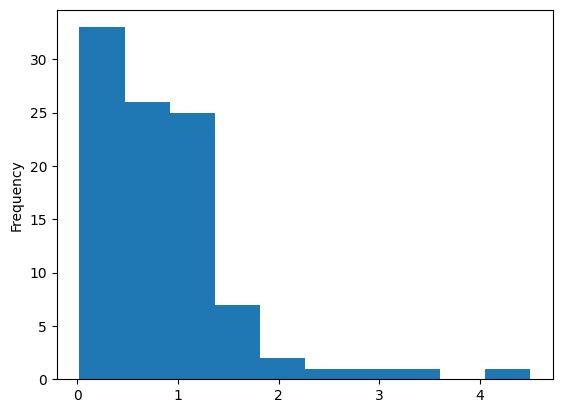

In [421]:
error_ratio.plot.hist()

Errors with countries with a lot of athletes are low whereas countries with very little athletes makes our error higher

In [422]:
error_ratio.sort_values()

team
FRA    0.022472
CAN    0.048387
NZL    0.063492
RUS    0.082353
ITA    0.121429
         ...   
MAR    2.000000
EGY    2.400000
HKG    3.000000
POR    3.333333
AUT    4.500000
Length: 97, dtype: float64

* Add in more predictors
* Try different models